Import Libraries

In [94]:
#Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-Processing
from sklearn.model_selection import train_test_split, cross_val_score

#Model building
from sklearn.linear_model import LinearRegression

#Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error

Load and explore the datatset

In [17]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [18]:
print('size of the data',df.shape)

size of the data (200, 4)


In [19]:
#Summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Key Business Insights:

1.TV is the most heavily used advertising medium, with the highest average and range in spend.

2.Radio has more consistent spending patterns (lower std dev), which may indicate fixed advertising slots or smaller campaigns.

3.Newspaper has very wide variation — some spend almost nothing, others up to $114k.

4.Sales vary significantly (1.6k to 27k units) — pointing to strong differences in campaign effectiveness.

5.Median sales (16K) is below the mean (15.1k) — slight Left skewed (some low scale  campaigns pulling down the average).

In [54]:
#checking for null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


***So we have no null values and good to go for analyzing the data in more profound manner***

EDA

In [24]:
#Correlation of Features
corr =df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


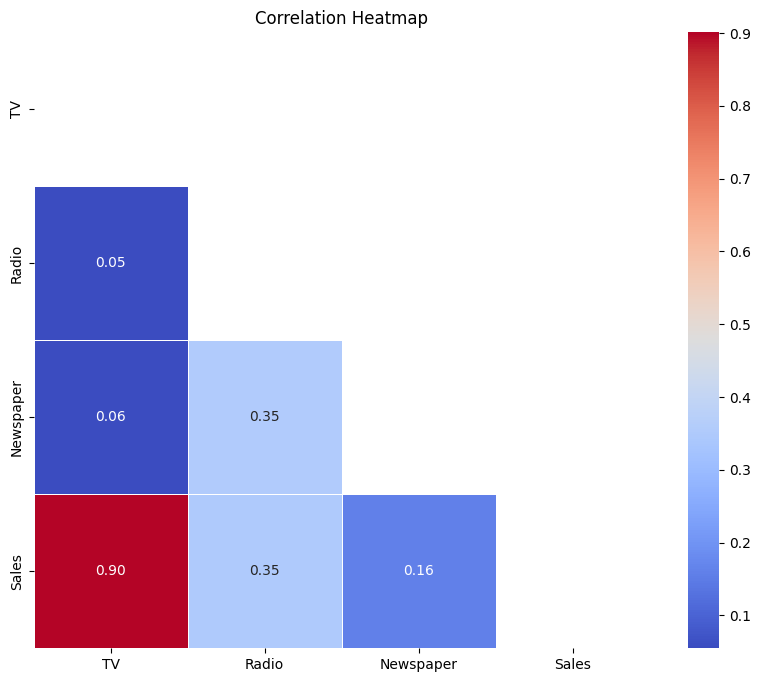

In [43]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr,
            mask=mask,       # Hide upper triangle
            cmap='coolwarm', # Color map (red to blue)
            annot=True,      # Show values in boxes
            square=True,     # Make cells square
            linewidths=.5,  # Add lines between cells
            fmt=".2f")       # Format numbers to 2 decimals

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

Key takeaways:

1.TV as media channel drives the sales massively.

2.Radio has a moderate effect and can support the sales.

3.Newspaper has low correlation, so the company should revaluate the decision to put newspaper as media channel for driving sales.Diverting the sales to above options or creating a different channel can be help drive the sales.

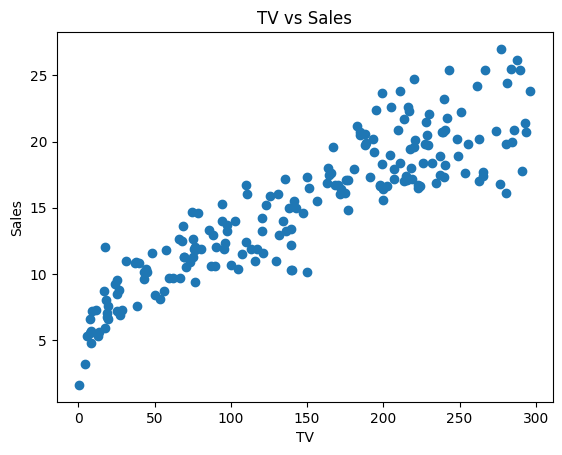

In [49]:
#visulaizing realtionships between each variables with sales
plt.scatter(df['TV'],df['Sales'])
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

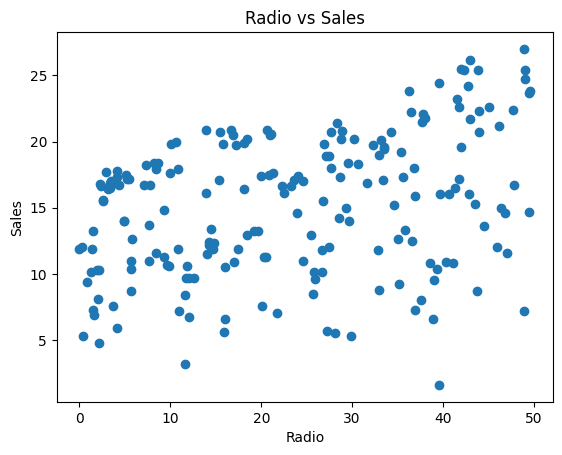

In [50]:
plt.scatter(df['Radio'],df['Sales'])
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

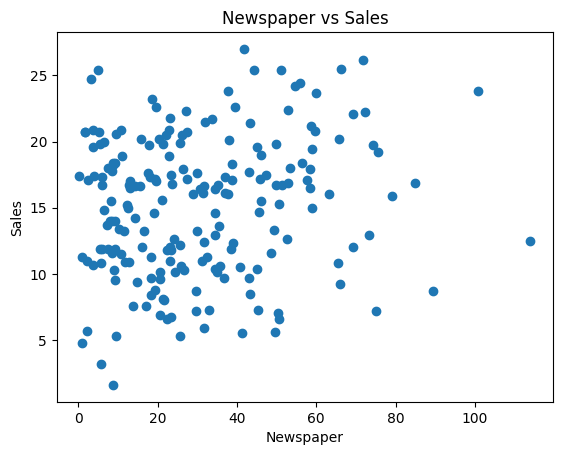

In [52]:
plt.scatter(df['Newspaper'],df['Sales'])
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

Backing up the findings using correlation, the relationship between Sales and TV is more linear.

Now, let's look at the relationship between the Features

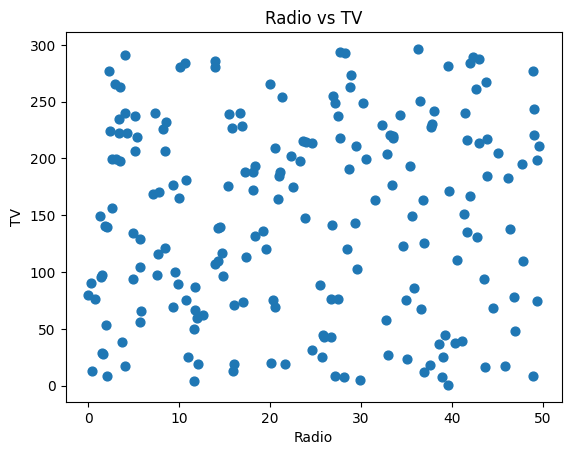

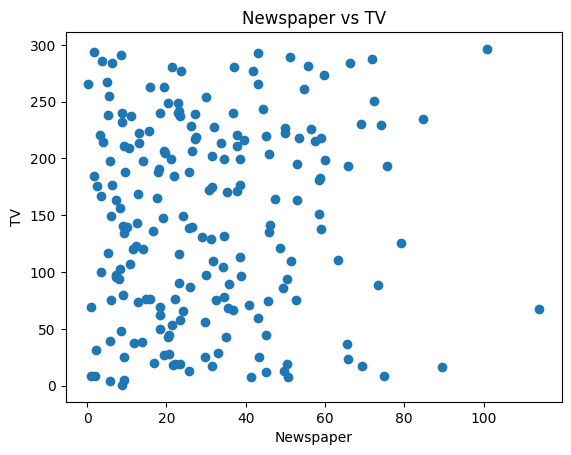

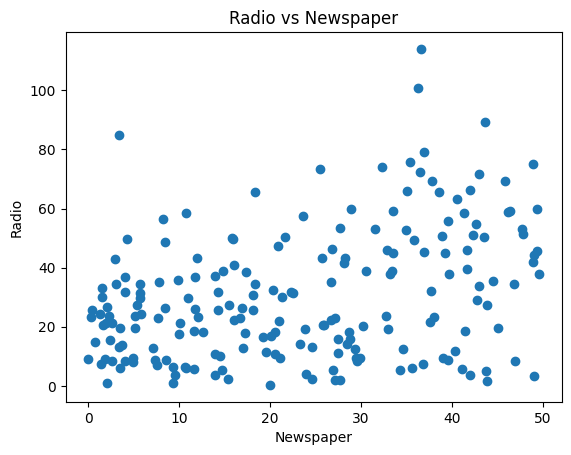

In [66]:

plt.scatter(df['Radio'],df['TV'])
plt.title('Radio vs TV')
plt.xlabel('Radio')
plt.ylabel('TV')
plt.show()

plt.scatter(df['Newspaper'],df['TV'])
plt.title('Newspaper vs TV')
plt.xlabel('Newspaper')
plt.ylabel('TV')
plt.show()


plt.scatter(df['Radio'],df['Newspaper'])
plt.title('Radio vs Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Radio')
plt.show()


It seems there's no clear linear relationships between the Features.

At this point, we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.


Now we will prepare the data for modelling

***MODEL EVALUATION***

In [71]:
x = df.drop(['Sales'],axis=1)
y = df['Sales']

In [81]:
print('Features')
print('Size:', x.shape)
print('DataType:', type(x))

print(x.head())


print('Target')
print('Size:', y.shape)
print('DataType:', type(y))

print(y.head())

Features
Size: (200, 3)
DataType: <class 'pandas.core.frame.DataFrame'>
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
Target
Size: (200,)
DataType: <class 'pandas.core.series.Series'>
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


In [83]:
#Train-Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print('x_train_size:',x_train.shape)
print('x_test_size:',x_test.shape)
print('y_train_size:',y_train.shape)
print('y_test_size:',y_test.shape)

x_train_size: (160, 3)
x_test_size: (40, 3)
y_train_size: (160,)
y_test_size: (40,)


In [84]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [87]:
y_preds = model.predict(x_test)

In [105]:
print("R2 Score:",r2_score(y_test,y_preds))
print(("MAE:",mean_absolute_error(y_test,y_preds)))
print(("MSE:",mean_squared_error(y_test,y_preds)))
print(("RMSE:",np.sqrt(mean_squared_error(y_test,y_preds))))

R2 Score: 0.9059011844150826
('MAE:', 1.2748262109549338)
('MSE:', 2.9077569102710896)
('RMSE:', np.float64(1.7052146229349223))


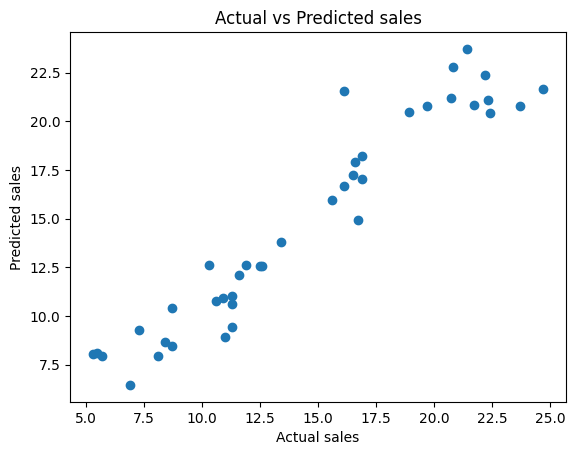

In [97]:
plt.scatter(y_test,y_preds)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual vs Predicted sales')
plt.show()

In [119]:
cv_score = cross_val_score(model, x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

Cross-Val Results: [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
Cross-Val Mean: 0.8915173447734139


The R2_Score is 0.90 and Cross-value mean in 0.89 with 10
k-folds, thus we can say that the model is not just
learning on training data (No overfitting) but works well
with unseen data.Cross validation helps to get this information

Now as we know that TV is highly correlation and is postively linear with the sales. we should try to predict using only TV as variable

***TV ONLY VARIABLE***

In [123]:
X = df[['TV']]
Y = df['Sales']

In [124]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [127]:
model_tv = LinearRegression
model.fit(X_train, Y_train)

LinearRegression()

In [154]:
Y_preds =model.predict(X_test)

In [155]:
print("R² Score:", r2_score(y_test, Y_preds))

R² Score: 0.802561303423698



Evaluation using only TV as feature:
Cross-Val Results: [0.83283252 0.72444029 0.77846467 0.87955404 0.76065371 0.88067487
 0.83508629 0.66102314 0.73611831 0.83119639]
Cross-Val Mean: 0.7920044239035755
MAE: 1.9502948931650088
MSE: 6.101072906773963
RMSE: 2.470035001123256


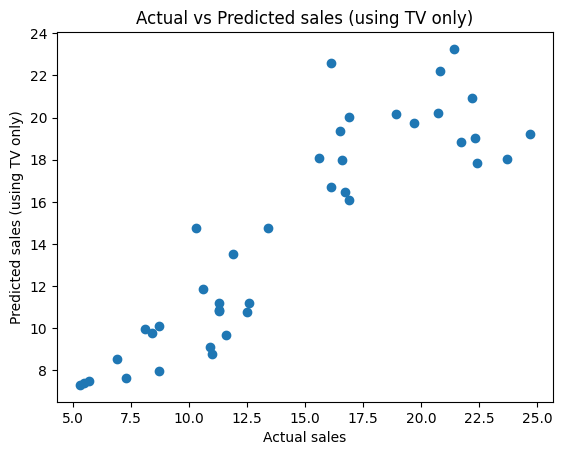

In [156]:
cv_score_tv = cross_val_score(model, X, Y, cv=10)

print("\nEvaluation using only TV as feature:")
print("Cross-Val Results:", cv_score_tv)
print("Cross-Val Mean:", cv_score_tv.mean())
print("MAE:", mean_absolute_error(Y_test, Y_preds))
print("MSE:", mean_squared_error(Y_test, Y_preds))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_preds)))


plt.scatter(Y_test, Y_preds)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales (using TV only)')
plt.title('Actual vs Predicted sales (using TV only)')
plt.show()

Model hasn't perfomed that well only considering the most correlated and linear variable TV.

TV Alone Doesn’t Drive Sales

Sales are likely influenced by more than just TV advertising.

Sales may need multi-channel exposure.

Now we should see using TV and Radio (Two most correlated)

***Model using TV and Radio***

In [158]:
x = df[['TV','Radio']]
y = df['Sales']

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [160]:
model_tv_radio = LinearRegression()
model_tv_radio.fit(x_train,y_train)

LinearRegression()

In [187]:
y_pred = model_tv_radio.predict(x_test)

In [188]:
print("R2 Score:",r2_score(y_test,y_pred))

R2 Score: 0.9078797802624651


**MODEL DIAGNOSTICS**

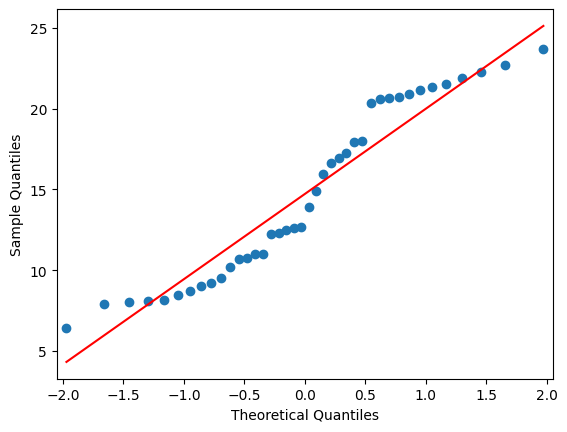

In [189]:
#qqplot
import statsmodels.api as sm
sm.qqplot(y_pred,line='s')
plt.show()

The Q-Q plot visualizes the residuals (actual − predicted) and is used to assess the normality of errors. If the residuals closely follow the theoretical quantiles (represented by the reference line), it indicates that the errors are approximately normally distributed, which is a key assumption in linear regression.

In our case we can see that model is struggling to predict the extreme spendings either be lower or higher, thus adds to the scope of the project that is checking for non linear relationships and outlier analysis.

As of now the model captures nearly 90% of variation very well and can help for future marketing decisions.It correctly explains the relationship of ad spends on sale capturing the important trends

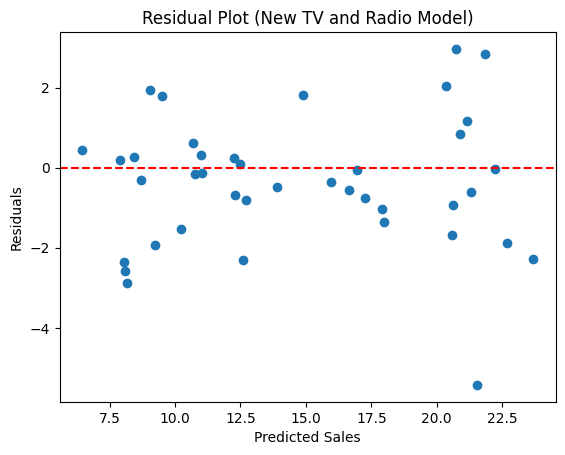

In [194]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot (New TV and Radio Model)')
plt.show()

The new model built around TV and Radio spends show a strong relationship with sales outcome, confirming that they are key drivers of performance.

while there are few high budget ad campaigns showed greated deviations than predicted results.

However our overall strategy is well aligned with impact of sales,thus can be confidently used for forecasting and planning



**CONCLUSION**

R2 Score Comparison:



1	TV Only = 0.802561

2	TV + Radio = 0.907880

3	All Channels = 0.905901

The linear regression model using TV and Radio as Features delivers the highest accuracy among all models tested.


This indicates that TV and Radio advertising have the strongest impact on driving sales, while Newspaper ads contribute minimally to sales performance.



**RECOMMENDATIONS** :

Based on these insights, it is advisable for the business to prioritize and allocate a larger share of the advertising budget to TV and Radio channels. Investments in Newspaper advertising may be reduced or re-evaluated, as they do not show a significant correlation with sales outcomes.